# Getting started with XGBoost 

## Installing XGBoost

    Run this on conda run
    
conda install -c anaconda py-xgboost

In [1]:
import xgboost

    Here for describing the implementation, I will use the pima-indians-diabetes.csv dataset from UCL Machine 
    Learning Repository.

## Loading the dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

## Preparing the data to use the XGBoost Classifier

In [6]:
# Preparing the feature and the response part of the dataframe

X = data.iloc[:,:-1]
y = data['Outcome']

In [7]:
# Splitting the data into training and testing data using sckit learn

from sklearn.model_selection import train_test_split

# Setting the value of seed for the random number generator so that we always get the same split data when we...
# ...always execute the code

seed = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state = seed)

## Training the XGBoost Model

In [8]:
from xgboost import XGBClassifier

In [9]:
model = XGBClassifier()

In [10]:
model.fit(X_train, y_train)

XGBClassifier()

## Making Predictions Using the Model

In [11]:
# Making predictions for the test data

predictions = model.predict(X_test)

## Evaluating the Model Accuracy

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy = accuracy_score(y_test, predictions)

In [14]:
accuracy

0.7362204724409449

# Data Preparation for Gradient Boosting

    XGBoost represent all problems as a regressive predictive modelling approach that only takes the numerical 
    values into account, so if our data is in some other form other than numerical then we need to convert it
    into the required format as per the XGBoost standard

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [16]:
# To demonstrate this we will use the iris dataset, to label encode the output values of the class of flowers

iris_data = pd.read_csv('Iris.csv')

In [17]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# We will first seperate the predictor data from the response data

X_iris = iris_data.iloc[:,:-1]
y_iris = iris_data['Species']

In [19]:
# We will use the scikit learn library's Label Encoder to encode the 'SPECIES' label

from sklearn.preprocessing import LabelEncoder

# Create the object of Wrapper class Label Encoder
label_encoder = LabelEncoder()

label_encoder = label_encoder.fit(y_iris)

label_encoded_y = label_encoder.transform(y_iris)

In [20]:
label_encoded_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# Splitting the data using the train_test_split

seed = 7

X_train, X_test, y_train, y_test = train_test_split(X_iris, label_encoded_y, test_size = 0.33, random_state=seed)

In [22]:
# Training the XGBoost Model

model = XGBClassifier()

In [23]:
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [24]:
# Now we will make predictions 

predictions_iris = model.predict(X_test)

In [25]:
# Checking the accuracy of the model

accuracy_score(y_test, predictions_iris)

0.98

In [26]:
# To show that sometimes that the data itself can contain categorical values we will use the breast cancer dataset

cancer_dataset = pd.read_csv('breast-cancer_csv.csv')

In [27]:
cancer_dataset.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [28]:
cancer_dataset.shape

(286, 10)

In [29]:
# As we can see that most of the predictors have categorical values of the dataset so we have to encode all of these

# Divinding the dataset into predictors and response variables

X_cancer = cancer_dataset.iloc[:,:-1]
y_cancer = cancer_dataset['Class']

In [30]:
# Encoding the y dataset

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_cancer)

label_encoded_y = label_encoder.transform(y_cancer)

In [31]:
label_encoded_y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
# Now the main task is to encode the predictor variables of our dataset

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [33]:
# As the breast cancer data for predictors of differennt patients cannot possibly be ordinal data so we have...
# ... to first encode the string data into labels then finally encode then into one-hot encoded data

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [34]:
X.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [35]:
X_cancer = X_cancer.astype('str')

In [36]:
column_data = []

for column in X_cancer.columns:
    
    
    label_encoder = LabelEncoder()
    encoded_data = label_encoder.fit_transform(X_cancer[[column]][column])
    encoded_data = np.array(encoded_data).reshape(X_cancer.shape[0], 1)
    one_hot_encoder = OneHotEncoder(sparse=False)
    one_hot_encoded_data = one_hot_encoder.fit_transform(encoded_data)
    
    column_data.append(one_hot_encoded_data)

In [37]:
X_cancer_encoded = np.column_stack(column_data)
X_cancer_encoded.shape

(286, 43)

In [38]:
# Now we will split the data into training and testing 

X_train, X_test, y_train, y_test = train_test_split(X_cancer_encoded, label_encoded_y, test_size = 0.33, 
                                                   random_state = 4)

In [39]:
# Training the XGBoost classifier

model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier()

In [40]:
predictions_cancer = model.predict(X_test)

In [41]:
# Checking the accuracy of our model

accuracy_score(y_test, predictions_cancer)

0.7473684210526316

## Evaluating XGBoost Models

### Evaluating Models using Training and Test Datasets

    Generally a split of 66% of data is used for training and 33% of the data is used for testing as seen in above 
    examples

### Evaluating Models Using K-Fold Cross Validation

In [42]:
from sklearn.model_selection import RepeatedKFold

In [43]:
# Implementing RepeatedKFold Cross Validation on the Breast Cancer Dataset

cancer_data = pd.read_csv('diabetes.csv')

In [44]:
cancer_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
X_cancer = cancer_data.iloc[:,:-1]
y_cancer = cancer_data['Outcome']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.33, random_state=7)

In [47]:
model_cancer = XGBClassifier()
model_cancer.fit(X_train, y_train)

XGBClassifier()

In [48]:
predictions_cancer = model_cancer.predict(X_test)

In [49]:
# The above two steps can be skipped and we can use the RepeatedKFold Cross Validation to calculate the accuracy...
# ...of the model

RKFold = RepeatedKFold(random_state=8)

In [50]:
# To evaluate the results of our XGBoost Model using cross validation we need to use cross_val score

from sklearn.model_selection import cross_val_score

In [51]:
results = cross_val_score(model_cancer, X=X_train, y = y_train, cv = RKFold)

In [52]:
results.mean()

0.7488044926708547

In [53]:
results.std()

0.038055094598678896

In [54]:
cancer_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [55]:
# As it can be seen above the distribution of the data in uneven, so for the situations where we have to do...
# ...classification and the frequency distribution of the classes is uneven then we should use StratifiedKFold...
# ... which can also be implemented using the scikit-learn library

from sklearn.model_selection import StratifiedKFold

In [56]:
SKFold = StratifiedKFold(random_state=7)

C:\Users\Jahanvi\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [57]:
results = cross_val_score(model_cancer, X = X_train, y = y_train, cv = SKFold)

In [58]:
results.mean()

0.7567485246525795

In [59]:
results.std()

0.040662656829913525

## Visualizing Individual Trees Within a Model

In [60]:
from xgboost import plot_tree
from matplotlib import pyplot as plt

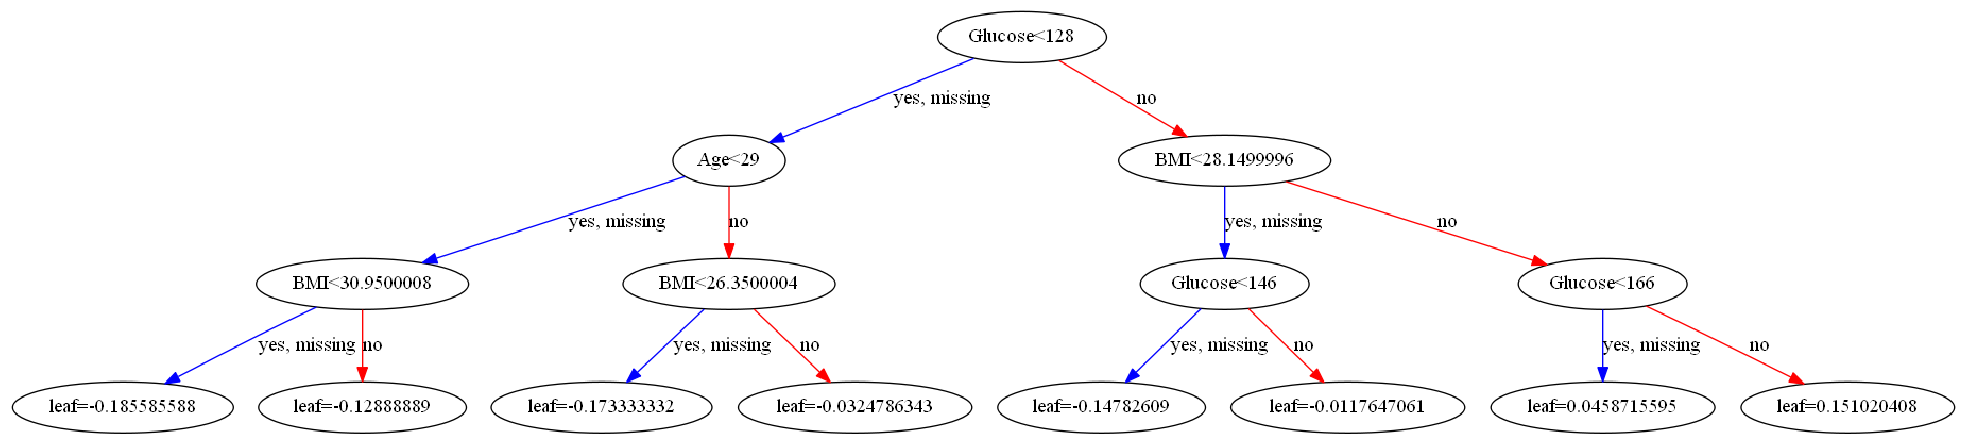

In [61]:
fig, ax = plt.subplots(figsize=(35,17))

plot_tree(model_cancer, ax=ax)
plt.show()

## Feature Importance And Feature Selection in XGBoost

### Feature Importance in Gradient Boosting

In [62]:
# Manually Plotting the feature importance

# Important feature statistics for the breast cancer model
model_cancer.feature_importances_

array([0.0775613 , 0.29183695, 0.08493615, 0.08040861, 0.09472006,
       0.15973376, 0.1021471 , 0.10865614], dtype=float32)

<BarContainer object of 8 artists>

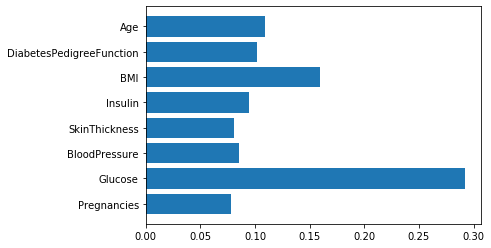

In [63]:
# Plotting a bar graph

plt.barh(X.columns, model_cancer.feature_importances_)

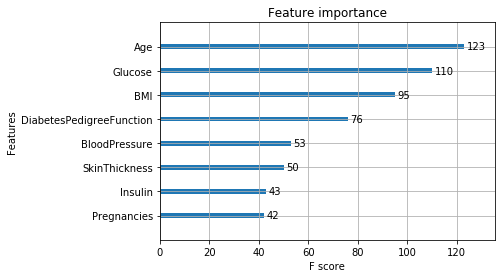

In [64]:
# Using the built-in function provided by xgboost to directly plot the graph of feature importances

from xgboost import plot_importance

plot_importance(model_cancer)

### Feature Selection with XGBoost Feature Importance Scores

In [65]:
# For selecting the important features from the important scores we use the scikit-learn's SelectFromModel class...
# ... which tranforms the given data set into the selected important features based on the certain value of ...
# ... the threshold which is being passed by the user.

from sklearn.feature_selection import SelectFromModel

In [66]:
# We already have the model_cancer for breast cancer dataset, now we will further explore it.

thresholds = sorted(model_cancer.feature_importances_)
print(thresholds)

[0.0775613, 0.08040861, 0.08493615, 0.09472006, 0.1021471, 0.10865614, 0.15973376, 0.29183695]


In [67]:
# So we are gonna try all the threshold values and try to analyse the accuracy of the model.

for thresh in thresholds:
    
    select_model = SelectFromModel(model_cancer, threshold=thresh, prefit=True)
    select_X_train = select_model.transform(X_train)
    
    model_select = XGBClassifier()
    model_select.fit(select_X_train, y_train)
    select_X_test = select_model.transform(X_test)
    predictions_select = model_select.predict(select_X_test)
    
    accuracy = accuracy_score(y_test, predictions_select)
    print("Accuracy = {}, Threshold = {}, n = {}".format(accuracy, thresh, select_X_train.shape[1]))

Accuracy = 0.7795275590551181, Threshold = 0.07756129652261734, n = 8
Accuracy = 0.7637795275590551, Threshold = 0.08040861040353775, n = 7
Accuracy = 0.7755905511811023, Threshold = 0.08493614941835403, n = 6
Accuracy = 0.7637795275590551, Threshold = 0.09472005814313889, n = 5
Accuracy = 0.7637795275590551, Threshold = 0.10214710235595703, n = 4
Accuracy = 0.7480314960629921, Threshold = 0.1086561381816864, n = 3
Accuracy = 0.7598425196850394, Threshold = 0.15973375737667084, n = 2
Accuracy = 0.7007874015748031, Threshold = 0.2918369472026825, n = 1


## Monitoring Training Performance and Early Stopping

In [68]:
# XGBoost can report the performance of the model during training, it supports the parameter which excepts the...
# ... Testing dataset values in order to see the performance metrics we set verbose True.

evaluation_set = [(X_test, y_test)]

model_cancer.fit(X_train, y_train, eval_metric='error', eval_set=evaluation_set, verbose=True)

[0]	validation_0-error:0.259843
[1]	validation_0-error:0.26378
[2]	validation_0-error:0.26378
[3]	validation_0-error:0.255906
[4]	validation_0-error:0.255906
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.23622
[7]	validation_0-error:0.255906
[8]	validation_0-error:0.248031
[9]	validation_0-error:0.248031
[10]	validation_0-error:0.248031
[11]	validation_0-error:0.232283
[12]	validation_0-error:0.228346
[13]	validation_0-error:0.228346
[14]	validation_0-error:0.228346
[15]	validation_0-error:0.228346
[16]	validation_0-error:0.228346
[17]	validation_0-error:0.228346
[18]	validation_0-error:0.224409
[19]	validation_0-error:0.232283
[20]	validation_0-error:0.232283
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.232283
[24]	validation_0-error:0.228346
[25]	validation_0-error:0.228346
[26]	validation_0-error:0.224409
[27]	validation_0-error:0.224409
[28]	validation_0-error:0.228346
[29]	validation_0-error:0.232283
[30]	validation_0-error:0.

XGBClassifier()

### Evaluating XGBoost Models With Learning Curves

In [69]:
# We can the testing set along with the training set in the eval_set in order to evaluate the learning curve and...
# ... and check for when the learning rate can be stopped.

cancer_model_2 = XGBClassifier()

In [70]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [71]:
cancer_model_2.fit(X_train, y_train, eval_metric=['error', 'logloss'], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.22179	validation_0-logloss:0.655153	validation_1-error:0.259843	validation_1-logloss:0.660186
[1]	validation_0-error:0.202335	validation_0-logloss:0.623322	validation_1-error:0.26378	validation_1-logloss:0.634854
[2]	validation_0-error:0.196498	validation_0-logloss:0.596814	validation_1-error:0.26378	validation_1-logloss:0.61224
[3]	validation_0-error:0.200389	validation_0-logloss:0.574027	validation_1-error:0.255906	validation_1-logloss:0.593118
[4]	validation_0-error:0.202335	validation_0-logloss:0.553853	validation_1-error:0.255906	validation_1-logloss:0.578303
[5]	validation_0-error:0.202335	validation_0-logloss:0.536789	validation_1-error:0.26378	validation_1-logloss:0.564942
[6]	validation_0-error:0.194553	validation_0-logloss:0.521477	validation_1-error:0.23622	validation_1-logloss:0.555113
[7]	validation_0-error:0.200389	validation_0-logloss:0.507802	validation_1-error:0.255906	validation_1-logloss:0.54499
[8]	validation_0-error:0.194553	validation_0-lo

[68]	validation_0-error:0.118677	validation_0-logloss:0.302821	validation_1-error:0.216535	validation_1-logloss:0.503108
[69]	validation_0-error:0.120623	validation_0-logloss:0.30198	validation_1-error:0.216535	validation_1-logloss:0.502674
[70]	validation_0-error:0.120623	validation_0-logloss:0.29991	validation_1-error:0.216535	validation_1-logloss:0.502662
[71]	validation_0-error:0.122568	validation_0-logloss:0.298055	validation_1-error:0.216535	validation_1-logloss:0.50343
[72]	validation_0-error:0.120623	validation_0-logloss:0.296987	validation_1-error:0.216535	validation_1-logloss:0.504037
[73]	validation_0-error:0.120623	validation_0-logloss:0.295123	validation_1-error:0.216535	validation_1-logloss:0.504439
[74]	validation_0-error:0.118677	validation_0-logloss:0.294368	validation_1-error:0.216535	validation_1-logloss:0.503696
[75]	validation_0-error:0.118677	validation_0-logloss:0.293513	validation_1-error:0.216535	validation_1-logloss:0.504477
[76]	validation_0-error:0.116732	va

XGBClassifier()

In [72]:
results = cancer_model_2.evals_result()

In [73]:
results

{'validation_0': {'error': [0.22179,
   0.202335,
   0.196498,
   0.200389,
   0.202335,
   0.202335,
   0.194553,
   0.200389,
   0.194553,
   0.188716,
   0.184825,
   0.180934,
   0.177043,
   0.178988,
   0.177043,
   0.175097,
   0.173152,
   0.173152,
   0.173152,
   0.173152,
   0.167315,
   0.169261,
   0.171206,
   0.173152,
   0.177043,
   0.173152,
   0.177043,
   0.177043,
   0.177043,
   0.175097,
   0.175097,
   0.177043,
   0.178988,
   0.175097,
   0.171206,
   0.16537,
   0.177043,
   0.163424,
   0.169261,
   0.167315,
   0.16537,
   0.167315,
   0.159533,
   0.155642,
   0.151751,
   0.149805,
   0.145914,
   0.143969,
   0.143969,
   0.142023,
   0.136187,
   0.138132,
   0.138132,
   0.138132,
   0.132296,
   0.136187,
   0.134241,
   0.13035,
   0.13035,
   0.13035,
   0.128405,
   0.128405,
   0.126459,
   0.126459,
   0.126459,
   0.126459,
   0.122568,
   0.122568,
   0.118677,
   0.120623,
   0.120623,
   0.122568,
   0.120623,
   0.120623,
   0.118677,
   0.1

In [74]:
# Now we are going to plot these error stats in order to see when does the error become uniform

# According to the order of the datasets passed in the eval_set training error stats will be considered in...
# ...in validation_0 and the test errors will be considered in validation_1

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

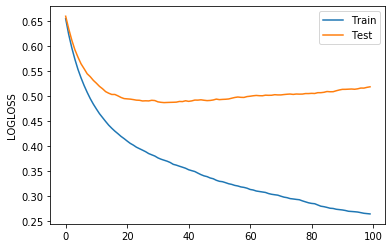

In [75]:
# Creating the logloss plot

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label="Train")
ax.plot(x_axis, results['validation_1']['logloss'], label="Test")
ax.legend()
plt.ylabel('LOGLOSS')
plt.show()

Text(0.5, 1.0, 'Classification Loss')

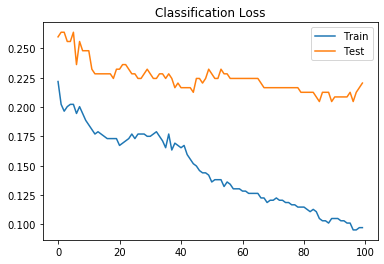

In [76]:
# In the above graph we can observe that arounf 20 to 40 epochs the error is minimum.

# Creating the Classification Plot

fig, ax = plt.subplots()

ax.plot(x_axis, results['validation_0']['error'], label="Train")
ax.plot(x_axis, results['validation_1']['error'], label="Test")
ax.legend()

plt.title("Classification Loss")

### Early Stopping the XGBoost Model

In [77]:
eval_set = [(X_test, y_test)]

In [78]:
# We need to set a window of epochs over ehich no improvement is observed

cancer_model_2.fit(X_train, y_train, eval_metric='logloss', eval_set=eval_set, early_stopping_rounds=10, 
                  verbose=True)

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.61224
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.519769
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


XGBClassifier()